In [1]:
from data_prov2 import *
import time

In [2]:
startT = -time.time()
X_Matrix,label = get_tt(select_method='basedtree')

['dataoutcapture_win15_9_1.csv', 'dataout2018-05-03_win11_9_1.csv', 'dataout2018-01-30_win10_9_1.csv', 'dataout2018-05-03_win16_9_1.csv', 'dataout2018-01-29_win7_9_1.csv', 'dataout2018-03-01_win11_9_1.csv', 'dataoutcapture_win11_9_1.csv', 'dataout2018-04-04_win16_9_1.csv']
x 2 times
x 2 times
x 2 times
define dara_train
(41892, 671)
x 2 times
x 2 times
x 2 times
(71584, 671)
x 3 times
x 2 times
x 2 times
x 2 times
(41055, 671)
(20376, 671)
(45462, 671)
(59303, 671)
(27998, 671)
(50255, 671)
feature select method:basedtree


/home/cadu/myrepo/traffic-src-spyder/src/data_prov2.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X, y)


In [3]:
corrc = cal_correction(X_Matrix+1)
print('Data loading is ...OK.')
print('Total time is: ',time.time()+startT)
print(X_Matrix+1)


X_M shape is: (357911, 105)
相关系数为：
[[ 1.         -0.05970252 -0.07039252 ... -0.0258542  -0.17856316
  -0.15777864]
 [-0.05970252  1.          0.18207481 ...  0.02971742  0.2914666
   0.24953984]
 [-0.07039252  0.18207481  1.         ...  0.02302867  0.03469386
   0.36204055]
 ...
 [-0.0258542   0.02971742  0.02302867 ...  1.          0.14479024
   0.16386378]
 [-0.17856316  0.2914666   0.03469386 ...  0.14479024  1.
   0.61395787]
 [-0.15777864  0.24953984  0.36204055 ...  0.16386378  0.61395787
   1.        ]]
Data loading is ...OK.
Total time is:  34.26138687133789
[[8.1000e+01 4.9163e+04 1.8000e+02 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 1.8900e+02 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 2.8300e+02 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 ...
 [5.4000e+01 6.0469e+04 3.5000e+01 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [5.4000e+01 6.0469e+04 3.5000e+01 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [3.3340e+03 4.9175e+04 7.4300e+02 ... 1.0000e+00 1.00

In [4]:
print(corrc.shape)
print(corrc)

(105, 105)
[[ 1.         -0.05970252 -0.07039252 ... -0.0258542  -0.17856316
  -0.15777864]
 [-0.05970252  1.          0.18207481 ...  0.02971742  0.2914666
   0.24953984]
 [-0.07039252  0.18207481  1.         ...  0.02302867  0.03469386
   0.36204055]
 ...
 [-0.0258542   0.02971742  0.02302867 ...  1.          0.14479024
   0.16386378]
 [-0.17856316  0.2914666   0.03469386 ...  0.14479024  1.
   0.61395787]
 [-0.15777864  0.24953984  0.36204055 ...  0.16386378  0.61395787
   1.        ]]


In [5]:
import pandas as pd
pd.DataFrame(corrc).to_csv('out.csv')

In [6]:
x=np.random.rand(5,5)
print(x,'\n',x+1)

[[0.11207817 0.93054627 0.82181454 0.09997882 0.90094658]
 [0.26305763 0.0160497  0.31049043 0.57442666 0.16000112]
 [0.40846434 0.04015424 0.17861163 0.78264342 0.90145498]
 [0.73344299 0.60079435 0.74288169 0.9441492  0.89190483]
 [0.27094172 0.74812772 0.84610088 0.02795806 0.42113795]] 
 [[1.11207817 1.93054627 1.82181454 1.09997882 1.90094658]
 [1.26305763 1.0160497  1.31049043 1.57442666 1.16000112]
 [1.40846434 1.04015424 1.17861163 1.78264342 1.90145498]
 [1.73344299 1.60079435 1.74288169 1.9441492  1.89190483]
 [1.27094172 1.74812772 1.84610088 1.02795806 1.42113795]]


In [7]:
import cv2

In [8]:
cv2.imwrite('xx.jpg',np.rint(np.random.rand(671,671)*256))

True

In [10]:
from feature_selector import FeatureSelector

In [12]:
fs = FeatureSelector(data=pd.DataFrame(X_Matrix),labels=label)

In [36]:
fs.identify_collinear(correlation_threshold = 0.8)
fs.plot_collinear(plot_all=True)

35 features with a correlation magnitude greater than 0.80.



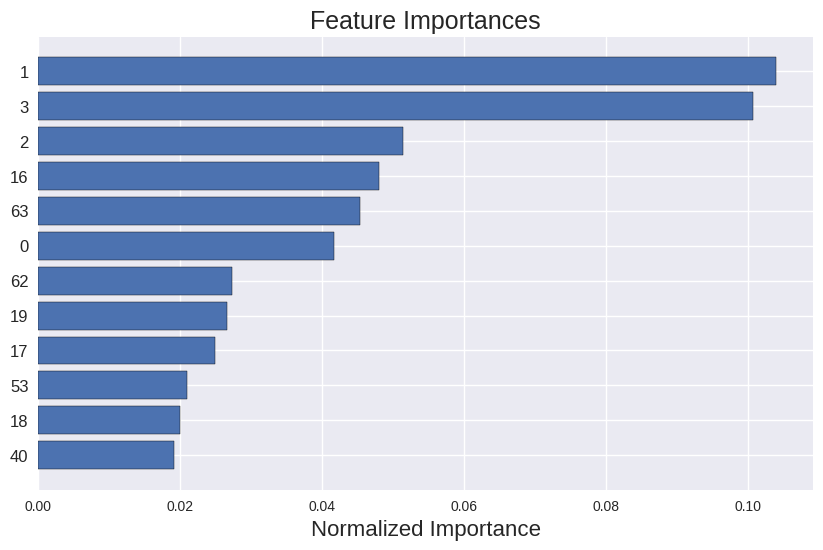

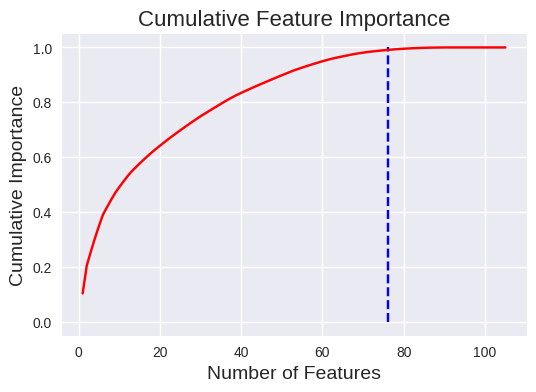

76 features required for 0.99 of cumulative importance


In [34]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [32]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,4,-0.811317,8
1,6,0.835505,9
2,2,0.955511,11
3,2,0.948653,12
4,11,0.981240,12


In [37]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
 eval_metric = 'auc', 
 n_iterations = 10, 
 early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']
#63 features with zero importance after one-hot encoding.
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.000137554
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.000433372
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.00063367
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.000358632
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.000596161
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.000317007
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.000476631
Training until validation scores don't improve for 100 rounds.

In [39]:
zero_importance_features = fs.ops['zero_importance']

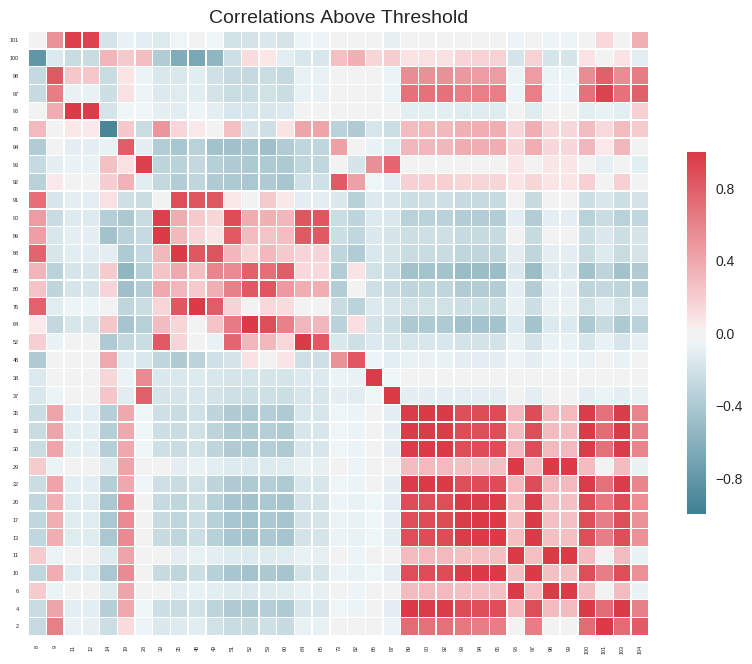

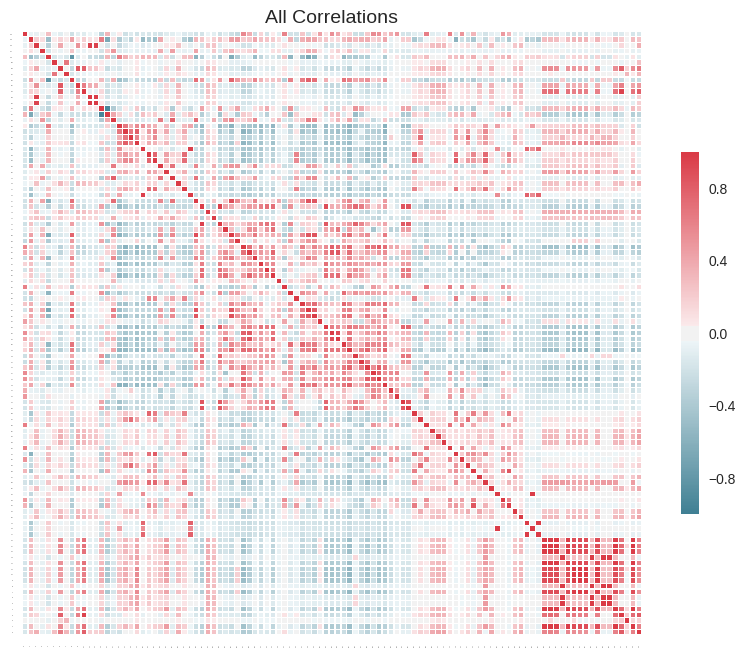

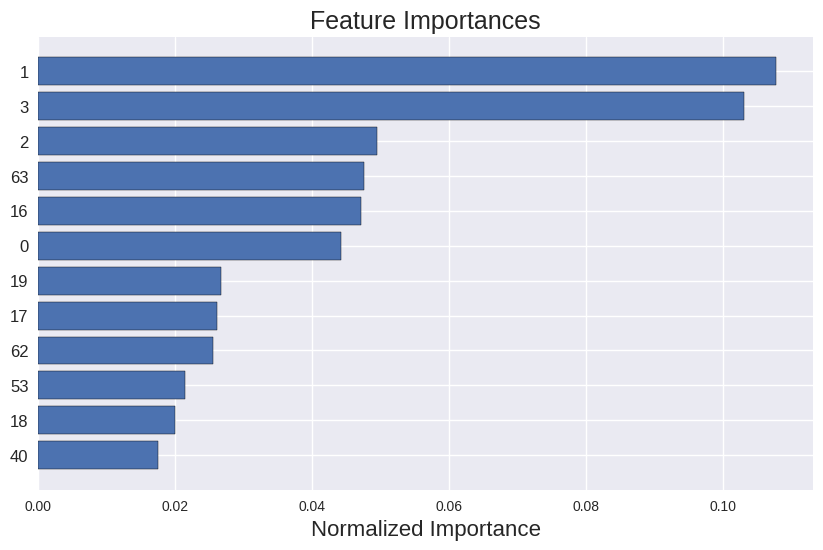

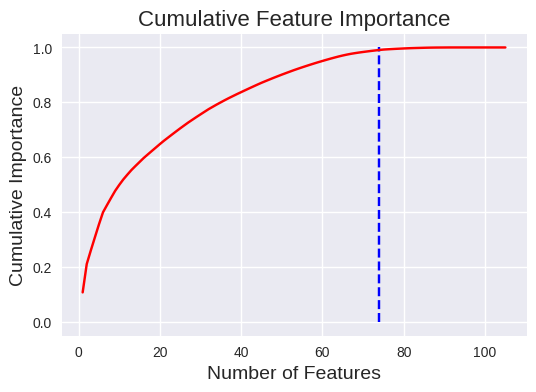

74 features required for 0.99 of cumulative importance


In [40]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)